# Cross Validation

In this jupyter notebook, I have implemented cross validation on two models: linear regression model and K-nearest neighbors model. I have used the Ship dataset.

In [2]:
# Importing necessary libraries 
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)
# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)
# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)
# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)
# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.neighbors import KNeighborsRegressor # for kNN
from sklearn import preprocessing # for scaling the data
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(371)
import matplotlib.pyplot as plt

Your numpy version: 1.23.5 (need at least 1.7.1)
Your SciPy version: 1.10.0 (need at least 0.12.0)
Your Pandas version:  1.5.3 (need at least 0.11.0)
Your Mapltolib version:  3.7.0 (need at least 1.2.1)
Your Scikit-Learn version:  1.2.1 (need at least 0.13.1)


In [3]:
# Load the dataset
df = pd.read_csv('./lab1_data.csv')
df.head()
#df.shape

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,694,5.94,3.55,42.64,36
1,Quest,Azamara,6,30.277,694,5.94,3.55,42.64,36
2,Celebration,Carnival,26,47.262,1486,7.22,7.43,31.80,67
3,Conquest,Carnival,11,110.000,2974,9.53,14.88,36.99,191
4,Destiny,Carnival,17,101.353,2642,8.92,13.21,38.36,100


In [4]:
# pick some columns for my practice and explore the dataset
cols = ["Tonnage", "length", "cabins", "crew", "passengers"]

df_selected = df[cols]

df_selected.describe()

,Tonnage,length,cabins,crew,passengers
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,8.130633,8.830000,78.012658,1845.740506
std,37.229540,1.793474,4.471417,35.020283,967.709478
min,2.329000,2.790000,0.330000,6.000000,66.000000
25%,46.013000,7.100000,6.132500,55.250000,1253.500000
50%,71.899000,8.555000,9.570000,81.500000,1950.000000
75%,90.772500,9.510000,10.885000,100.000000,2484.500000
max,220.000000,11.820000,27.000000,210.000000,5400.000000


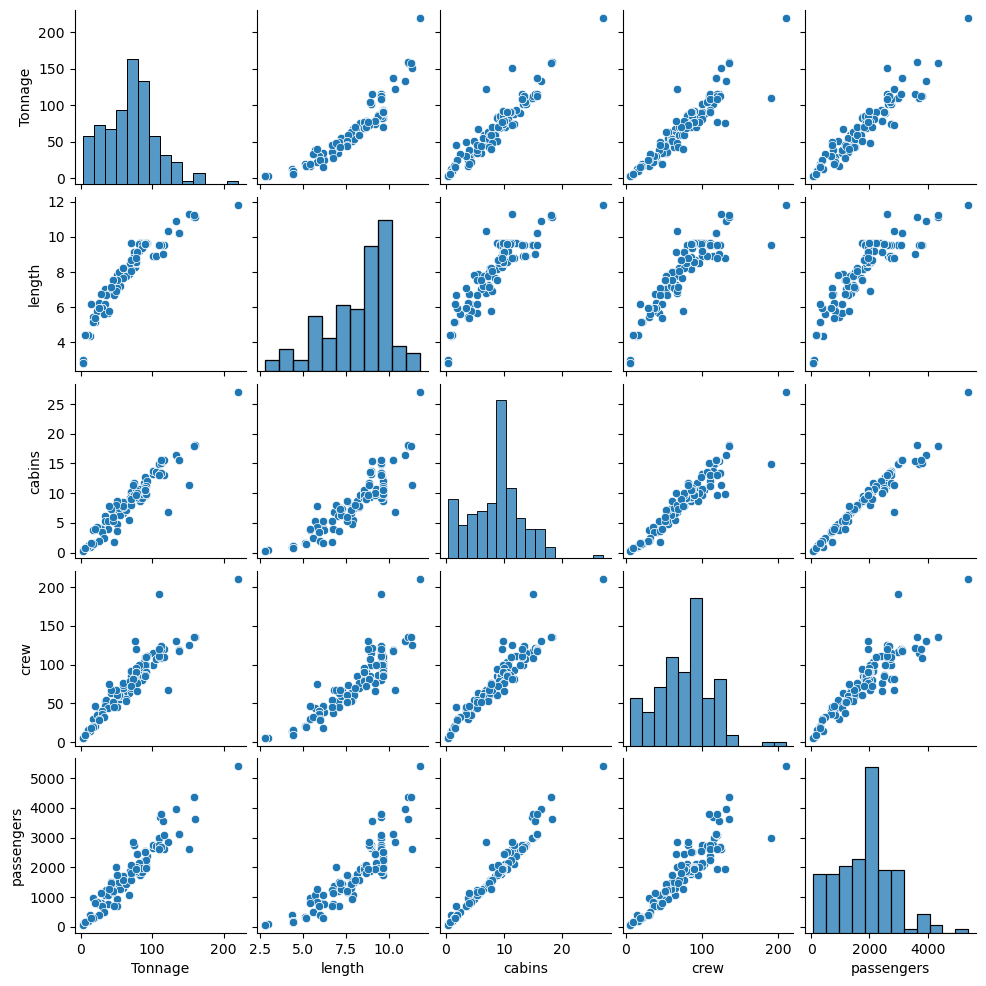

In [5]:
sns.pairplot(df_selected, height=2.0)

## Question 1 - What are your observations from this pair plot? 

My observations from this pairplot are as below:
1. All 5 variables are positively and strongly correlated to each other
2. Passenger variable is most strongly correlated to cabin as compared to other variables

## Prepare the data using cross validation

In [6]:
x_cols = ["Tonnage", "length", "cabins", "crew"]
y_col = "passengers"

X_full = df_selected[x_cols]
y_full = df_selected[y_col]

In [7]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls

In [8]:
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)

(126, 4) (32, 4)
(126, 4) (32, 4)
(126, 4) (32, 4)
(127, 4) (31, 4)
(127, 4) (31, 4)


## Compare LR and KNN (k=3)

In [9]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)

## Training linear regression model

In [10]:
# 2 types of error
r2_lr_list = []
mse_lr_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_lr = lr.fit(X_train, y_train)
    y_pred = m_lr.predict(X_test)
    
    # R^2
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    r2_lr_list.append(r2_lr)
    
    # mean squared error
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_lr_list.append(mse_lr)

print("average R2 score for linear regression:", np.mean(r2_lr_list))
print("average MSE linear regression:", np.mean(mse_lr_list))

average R2 score for linear regression: 0.9480419620768963
average MSE linear regression: 41375.76966487429


## Traing KNN model

In [11]:
r2_knn_list = []
mse_knn_list = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # knn Model
    m_knn = knn.fit(X_train, y_train)
    y_pred = m_knn.predict(X_test)
    
    # R^2
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    r2_knn_list.append(r2_knn)
    
    # mean squared error
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_knn_list.append(mse_knn)
    
print("average R2 score for knn regression:", np.mean(r2_knn_list))
print("average MSE knn regression:", np.mean(mse_knn_list))

average R2 score for knn regression: 0.8844743932435826
average MSE knn regression: 104455.40707885305


## Which model is better?

From the above results, we can conclude that the linear regression model has a better performance. This is because it has a higher r2 value and a lower MSE value as compared to that of the KNN model.

## A short-cut to do cross-validation

In [12]:
metrics = ('r2', 'neg_mean_squared_error')

results_lr = cross_validate(estimator=lr, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
results_knn = cross_validate(estimator=knn, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)

In [13]:
results_lr

{'fit_time': array([0.00094986, 0.00079417, 0.00082183, 0.00103116, 0.00069022]),
 'score_time': array([0.00062823, 0.00046301, 0.00046301, 0.00064373, 0.0004108 ]),
 'test_r2': array([0.97581596, 0.9508146 , 0.96105864, 0.87857793, 0.97394268]),
 'train_r2': array([0.95334727, 0.96172013, 0.96041017, 0.97190647, 0.95634131]),
 'test_neg_mean_squared_error': array([-33643.29805604, -31760.63421478, -33538.33128831, -86406.84704642,
        -21529.73771883]),
 'train_neg_mean_squared_error': array([-37477.03868869, -38280.1317768 , -37520.51317443, -27045.66461286,
        -40418.56065386])}

In [14]:
print("average R2 score for LR:", results_lr["test_r2"].mean())
print("average R2 score KNN:", results_knn["test_r2"].mean())

print("average MSE linear regression:", results_lr["test_neg_mean_squared_error"].mean())
print("average MSE for KNN:", results_knn["test_neg_mean_squared_error"].mean())

average R2 score for LR: 0.9480419620768963
average R2 score KNN: 0.8844743932435826
average MSE linear regression: -41375.76966487429
average MSE for KNN: -104455.40707885305


In [15]:
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_results = df_results.append({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, ignore_index=True)

df_results

/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_5484/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_5484/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_5484/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_5484/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_

,k,train_error,test_error
0,1.0,0.707662,97386.466734
1,2.0,28913.530727,96072.199244
2,3.0,49546.975078,104455.407079
3,4.0,62332.373654,113585.888445
4,5.0,72862.633856,118121.459669
5,6.0,80881.137901,121470.921360
6,7.0,84954.388989,118872.146079
7,8.0,88831.092269,123161.196072
8,9.0,90639.171844,116838.024111
9,10.0,94161.930059,114674.361974


#### A deprecation error. I have fixed that error and re-written the code

In [16]:
## New code here
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_new_row = pd.DataFrame({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, index = [k-1])
    
    df_results = pd.concat([df_results,df_new_row])
df_results

,k,train_error,test_error
0,1.0,0.707662,97386.466734
1,2.0,28913.530727,96072.199244
2,3.0,49546.975078,104455.407079
3,4.0,62332.373654,113585.888445
4,5.0,72862.633856,118121.459669
5,6.0,80881.137901,121470.921360
6,7.0,84954.388989,118872.146079
7,8.0,88831.092269,123161.196072
8,9.0,90639.171844,116838.024111
9,10.0,94161.930059,114674.361974


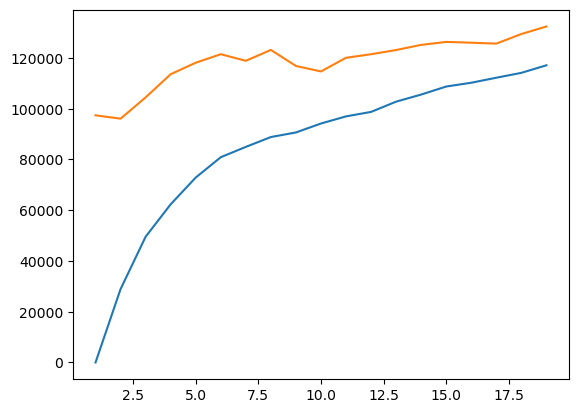

In [17]:
plt.plot(df_results['k'], df_results['train_error'])
plt.plot(df_results['k'], df_results['test_error'])

In [18]:
scaler = preprocessing.StandardScaler()

array([[<Axes: title={'center': 'Tonnage'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'cabins'}>,
        <Axes: title={'center': 'crew'}>]], dtype=object)

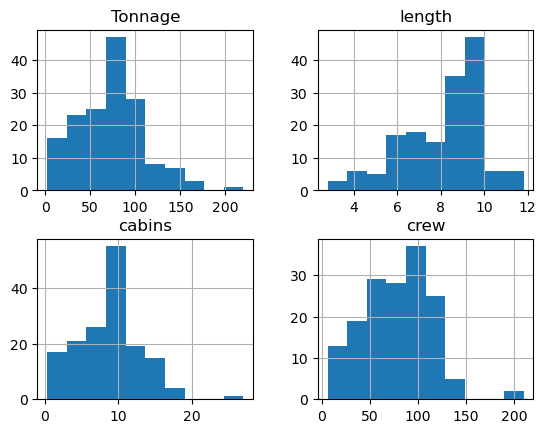

In [19]:
X_full.hist()

array([[<Axes: title={'center': 'Tonnage'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'cabins'}>,
        <Axes: title={'center': 'crew'}>]], dtype=object)

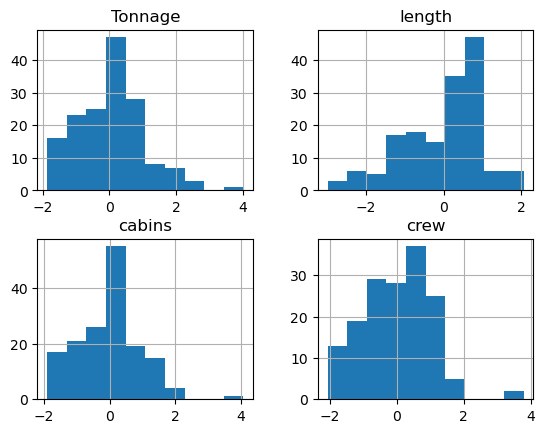

In [20]:
X_full_transform = scaler.fit(X_full).transform(X_full)
# same results:
# X_full_transform = scaler.fit_transform(X_full)

X_full_transform = pd.DataFrame(X_full_transform, columns=X_full.columns)
X_full_transform.hist()

In [21]:
r2_lr_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_lr = lr.fit(X_train_standard, y_train)
    y_pred = m_lr.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_lr_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_le)
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("average R2 score:", np.mean(r2_lr_list))
print("average MSE:", np.mean(mse_lr_list))

average R2 score: 0.9480419620768965
average MSE: 41375.769664874235
average R2 score: 0.9480419620768963
average MSE: 41375.76966487429


## Question: How does the results compared to the previous linear regression model without scaling? Why?

#### The results are the same as that of the previous liner regression model without scaling. In simple linear regression, scaling down only alters the input features and not the regression coefficients, which are essentially the parameters learned during modelling. Consequently, the fit is not affected by scaling. 

## Train a KNN (K=3) model with the scaling.

In [22]:
r2_knn_list_scale = []
mse_knn_list_scale = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_knn = knn.fit(X_train_standard, y_train)
    y_pred = m_knn.predict(X_test_standard)
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_knn_list_scale.append(r2_knn)
    mse_knn_list_scale.append(mse_le_knn)
    
print("average R2 score:", np.mean(r2_knn_list_scale))
print("average MSE:", np.mean(mse_knn_list_scale))

print("average R2 score:", np.mean(r2_knn_list))
print("average MSE:", np.mean(mse_knn_list))

average R2 score: 0.92885355932448
average MSE: 69669.86742831541
average R2 score: 0.8844743932435826
average MSE: 104455.40707885305


## Question: How does the results compared to the previous KNN model without scaling? Why?

#### The results show that the performance of the KNN model improved after scaling. The value of r2 has increased and the value of MSE has decreased, which are both signs of better performance. 

KNN algorithm is based on the distance measures. There is a possibility of certain features having a relatively higher value as that compared to others. Features with larger scale have a more dominant impact on distance measures which leads to inaccurate results. Scaling is performed to ensure all features are transformed to a common scale such that they have an equal impact on the calculations. With the help of scaling, we are able to improve the model performance.
Consequently, in the above scenario, the model performance improved after scaling.